In [1]:
# IMPORT MODULES
import numpy as np
import tensorflow as tf
import keras
import random
import matplotlib.pyplot as plt
from tensorflow.contrib.layers import flatten
from tensorflow.keras.datasets import fashion_mnist
from keras.layers import Convolution2D, Input, Activation, Flatten, Dense
from keras.optimizers import Adam

# Network Diagram
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
%matplotlib inline

Using TensorFlow backend.


In [13]:
# LOAD DATA
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)
print("X test shape:", x_test.shape)
print("Y test shape:", y_test.shape)

# Reshape the data (num_sample, image_width, image_height, channel)
# This format is what CNN layer expects the input to be in.
num_train_sample = x_train.shape[0]
num_test_sample = x_test.shape[0]
image_width = x_train.shape[1]
image_height = x_train.shape[2]
channel = 1
num_class = 10

x_train = x_train.reshape(num_train_sample, image_width, image_height, channel)
x_test = x_test.reshape(num_test_sample, image_width, image_height, channel)

# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

X train shape: (60000, 28, 28)
Y train shape: (60000,)
X test shape: (10000, 28, 28)
Y test shape: (10000,)


In [14]:
# Shape after one hot encoding
print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)
print("X test shape:", x_test.shape)
print("Y test shape:", y_test.shape)

X train shape: (60000, 28, 28, 1)
Y train shape: (60000, 10)
X test shape: (10000, 28, 28, 1)
Y test shape: (10000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


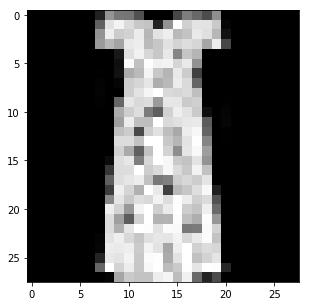

In [15]:
# DATA EXPLORATION
# Load a random image
index = random.randint(0, num_train_sample)
image = x_train[index]
image = image.reshape((image_width, image_height))

# Visualize the image
plt.figure(figsize = (5, 5))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [16]:
# CREATE MODEL
from keras.models import Model
from keras.layers.convolutional import Conv2D

# Conv2D Block: returns tensor output
def Conv2DBlock(layer_input, num_filters, kernel_size):
    layer = Conv2D(filters=num_filters,
                   kernel_size=(kernel_size, kernel_size),
                   kernel_initializer="he_normal", padding="same")(layer_input)
    layer = Activation("relu")(layer)
    return layer

# Network Function: returns model[input, output]
def Network(network_input, num_filters):
    c1 = Conv2DBlock(network_input, num_filters=num_filters, kernel_size=3)
    c2 = Conv2DBlock(c1, num_filters=num_filters * 2, kernel_size=3)
    # Fully Connected Layer: output = (num_sample, 10)
    f = Flatten()(c2)
    d = Dense(num_class)(f)
    model = Model(inputs=[network_input], outputs=[d])
    return model

In [17]:
input_img = Input((28, 28, 1), name='img')
model = Network(input_img, num_filters=32)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                501770    
Total para

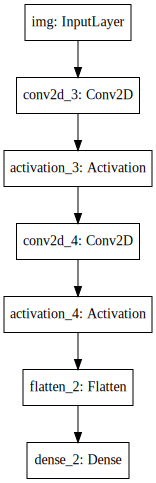

In [19]:
# Visualize network
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [20]:
# Setup model (specify optimizer, loss function and metrics)
model.compile(optimizer = Adam(), loss = 'mean_squared_error', metrics = ["accuracy", "binary_accuracy", "mse"])

print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)

X train shape: (60000, 28, 28, 1)
Y train shape: (60000, 10)


In [ ]:
results = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=2)

Epoch 1/10
94s - loss: 0.0394 - acc: 0.7709 - binary_accuracy: 0.9531 - mean_squared_error: 0.0394
Epoch 2/10
97s - loss: 0.0381 - acc: 0.7770 - binary_accuracy: 0.9547 - mean_squared_error: 0.0381
Epoch 3/10
98s - loss: 0.0367 - acc: 0.7848 - binary_accuracy: 0.9563 - mean_squared_error: 0.0367
Epoch 4/10
98s - loss: 0.0348 - acc: 0.8000 - binary_accuracy: 0.9590 - mean_squared_error: 0.0348
Epoch 5/10
97s - loss: 0.0335 - acc: 0.8086 - binary_accuracy: 0.9609 - mean_squared_error: 0.0335
Epoch 6/10
98s - loss: 0.0324 - acc: 0.8159 - binary_accuracy: 0.9624 - mean_squared_error: 0.0324
Epoch 7/10


In [ ]:
sample = x_train[0]
sample = sample.reshape(1, 28, 28, 1)

print(model.predict(sample))
print(y_train[0])

In [ ]:
model.save("03-16-2019-model.h5")